# Simple Linear Regression

### Build a Simple Linear Regression model for food-based company to understand the relationship between person’s weight gain and the number of calories they consumed to come up with diet plans for each individuals. The calories consumed is the target variable. Also understand the correaltion and RMSE between the weight gain and calories consumed.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

In [2]:
# import dataset
user_diet = pd.read_csv(r"D:\360digi\DS\Sharath\Simple_linearRegression\handson\Datasets_SLR\calories_consumed.csv")
user_diet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Weight gained (grams)  14 non-null     int64
 1   Calories Consumed      14 non-null     int64
dtypes: int64(2)
memory usage: 352.0 bytes


In [3]:
user_diet.describe()

,Weight gained (grams),Calories Consumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


In [4]:
user_diet.columns

Index(['Weight gained (grams)', 'Calories Consumed'], dtype='object')

In [5]:
user_diet.rename(columns = {'Weight gained (grams)':'Weight_gained', 'Calories Consumed':'Calories_consumed'}, inplace = True)

In [6]:
user_diet.sort_values('Weight_gained', ascending = True, inplace = True)

In [7]:
user_diet.reset_index(inplace = True, drop = True)

In [8]:
user_diet.head()

,Weight_gained,Calories_consumed
0,62,1900
1,100,1670
2,108,1500
3,110,1600
4,128,1400


In [ ]:
# Split the data into Target and Predictors

In [9]:
X = pd.DataFrame(user_diet['Weight_gained'])

In [10]:
Y = pd.DataFrame(user_diet['Calories_consumed'])

In [11]:
# Select numeric features for data preprocessing
numeric_features = ['Weight_gained']
numeric_features

['Weight_gained']

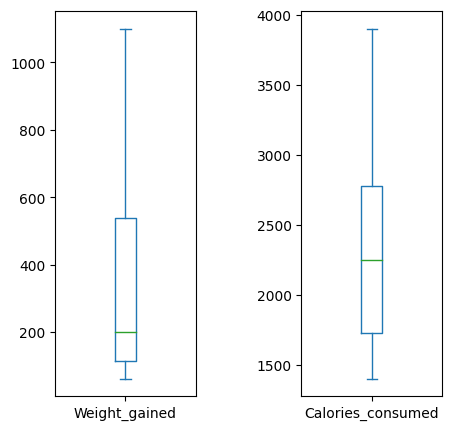

In [12]:
# box plot visualisation
user_diet.plot(kind = 'box', subplots = True, sharey = False, figsize = (5,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()
#No outliers

In [13]:
# missing value check
user_diet.isnull().sum()

Weight_gained        0
Calories_consumed    0
dtype: int64

In [ ]:
# Below steps are not necessary for our dataset but creating a pipeline so we can test the algorithm with new dataset easily.

In [14]:
# Winsorization
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = numeric_features)
winsor

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['Weight_gained'])

In [15]:
num_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy = 'mean'))])
num_pipeline

Pipeline(steps=[('impute', SimpleImputer())])

In [16]:
outlier_pipeline = Pipeline(steps = [('winsor', winsor)])
outlier_pipeline

Pipeline(steps=[('winsor',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['Weight_gained']))])

In [17]:
preprocessor = ColumnTransformer(transformers = [('num', num_pipeline, numeric_features)])
print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer())]),
                                 ['Weight_gained'])])


In [18]:
preprocessor1 = ColumnTransformer(transformers = [('wins', outlier_pipeline, numeric_features)])
print(preprocessor1)

ColumnTransformer(transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Weight_gained']))]),
                                 ['Weight_gained'])])


In [19]:
impute_data = preprocessor.fit(X)

In [20]:
user_diet['Weight_gained'] = pd.DataFrame(impute_data.transform(X))

In [21]:
X2 = pd.DataFrame(user_diet['Weight_gained'])

In [22]:
winz_data = preprocessor1.fit(X2)

In [23]:
user_diet['Weight_gained'] = pd.DataFrame(winz_data.transform(X))

In [24]:
user_diet.head()

,Weight_gained,Calories_consumed
0,62,1900
1,100,1670
2,108,1500
3,110,1600
4,128,1400


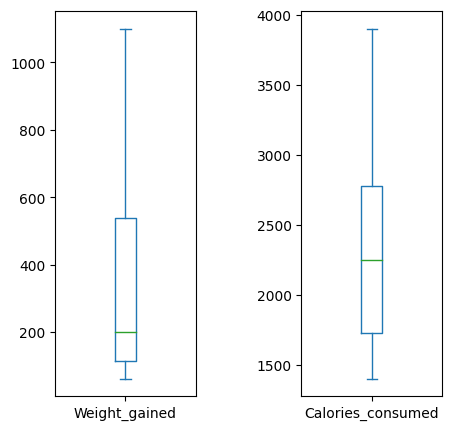

In [25]:
# box plot visualisation
user_diet.plot(kind = 'box', subplots = True, sharey = False, figsize = (5,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [ ]:
# Exploratory data analysis

In [26]:
import sweetviz as sv

report = sv.analyze(user_diet)
report.show_html('EDAreport.html')

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:00 -> (00:00 left)


Report EDAreport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# Graphical analysis

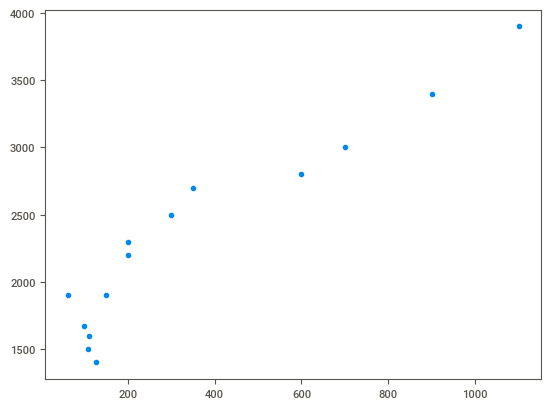

In [27]:
# # Bivariate Analysis
# Scatter plot
plt.scatter(x = user_diet['Weight_gained'], y = user_diet['Calories_consumed']) 

In [ ]:
# Shape: linear/ exponential
# Direction : positive

In [28]:
# Correlation coefficient
np.corrcoef(user_diet.Weight_gained, user_diet.Calories_consumed)

array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

In [29]:
# Covariance
cov_output = np.cov(user_diet.Weight_gained, user_diet.Calories_consumed)[0, 1]
cov_output

237669.45054945053

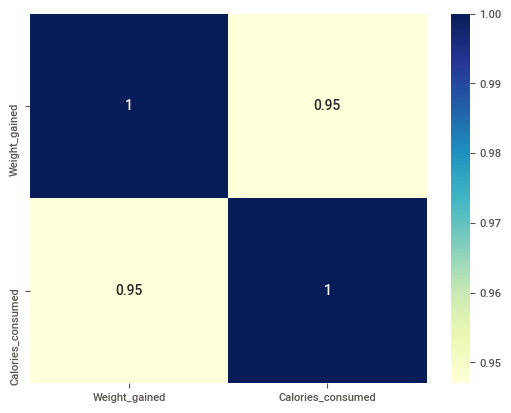

In [30]:
#Heatmap
dataplot = sns.heatmap(user_diet.corr(), annot = True, cmap = "YlGnBu")

# Regression Techniques

### Simple Linear Regression Y ~ X

In [31]:
model = smf.ols('Calories_consumed ~ Weight_gained', data = user_diet).fit()
model.summary()

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Calories_consumed   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           2.86e-07
Time:                        00:46:50   Log-Likelihood:                -96.170
No. Observations:                  14   AIC:                             196.3
Df Residuals:                      12   BIC:                             197.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1577.2007    100.541     15.687      0.000    1358.141    1796.260
Weight_gained     2.1344      0.209     10.211      0.000       1.679       2.590
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   0.935
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.425
Skew:                          -0.098   Prob(JB):                        0.808
Kurtosis:                       2.169   Cond. No.                         719.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# cal = 1577.2007 + 2.1344(Weight_gained)
# R-squared : 0.897  where |r| > 0.85 is considered as strong correlation
# RMSE : 232.8335

In [32]:
pred1 = model.predict(pd.DataFrame(user_diet['Weight_gained']))

pred1

0     1709.534925
1     1790.642998
2     1807.718381
3     1811.987227
4     1850.406841
5     1897.364146
6     2004.085294
7     2004.085294
8     2217.527589
9     2324.248737
10    2857.854477
11    3071.296772
12    3498.181364
13    3925.065955
dtype: float64

In [33]:
# Error calculation (error = AV - PV)
res1 = user_diet.Calories_consumed - pred1

print(np.mean(res1))

-5.359522349733327e-13


In [34]:
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

232.8335007096089

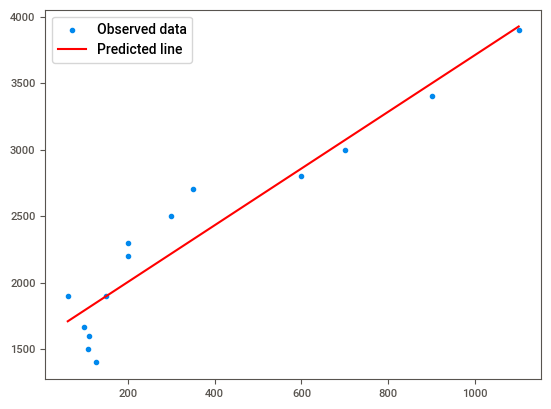

In [35]:
# Regression Line
plt.scatter(user_diet.Weight_gained, user_diet.Calories_consumed)
plt.plot(user_diet.Weight_gained, pred1, "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()

## Model Tuning with Transformations

### Log Transformation
### x = log(Weight_gained); y = Calories_consumed

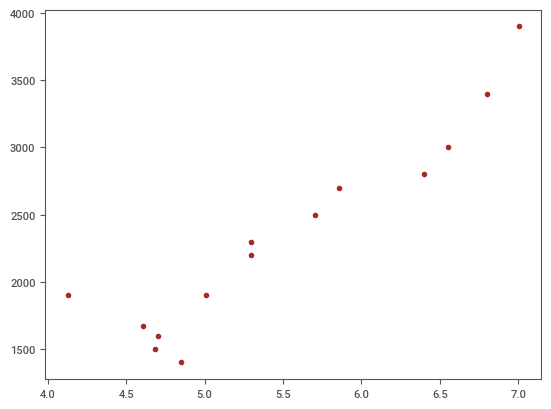

In [36]:
plt.scatter(x = np.log(user_diet['Weight_gained']), y = user_diet['Calories_consumed'], color = 'brown')

In [37]:
#correlation
np.corrcoef(np.log(user_diet.Weight_gained), user_diet.Calories_consumed)

array([[1.        , 0.93680369],
       [0.93680369, 1.        ]])

In [38]:
model2 = smf.ols('Calories_consumed ~ np.log(Weight_gained)', data = user_diet).fit()
model2.summary()

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Calories_consumed   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     86.04
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           8.02e-07
Time:                        00:47:14   Log-Likelihood:                -97.363
No. Observations:                  14   AIC:                             198.7
Df Residuals:                      12   BIC:                             200.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1911.1244    464.188     -4.117      0.001   -2922.503    -899.746
np.log(Weight_gained)   774.1735     83.462      9.276      0.000     592.326     956.021
==============================================================================
Omnibus:                        4.026   Durbin-Watson:                   1.088
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                1.659
Skew:                           0.772   Prob(JB):                        0.436
Kurtosis:                       3.679   Cond. No.                         36.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# cal = -1911.1244 + 774.1735(log(Weight_gained))
# R-squared : 0.878  where |r| > 0.85 is considered as strong correlation
# RMSE : 253.5580

In [39]:
pred2 = model2.predict(pd.DataFrame(user_diet['Weight_gained']))

In [40]:
# Error calculation
res2 = user_diet.Calories_consumed - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

253.55804039366248

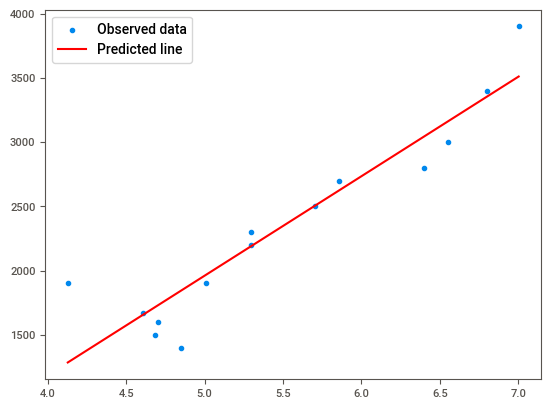

In [41]:
# Regression Line
plt.scatter(np.log(user_diet.Weight_gained), user_diet.Calories_consumed)
plt.plot(np.log(user_diet.Weight_gained), pred2, "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()

### Exponential transformation
### x = Weight_gained; y = log(Calories_consumed)

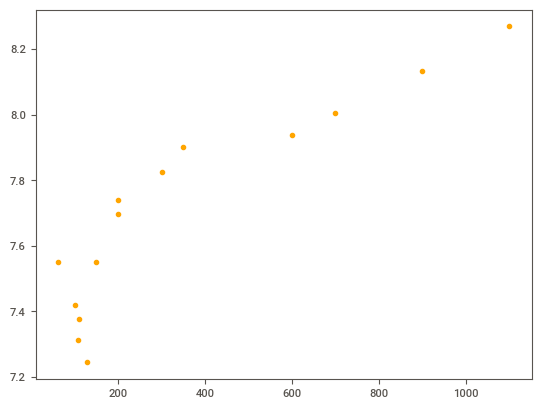

In [42]:
plt.scatter(x = user_diet['Weight_gained'], y = np.log(user_diet['Calories_consumed']), color = 'orange')

In [43]:
#correlation
np.corrcoef(user_diet.Weight_gained, np.log(user_diet.Calories_consumed))

array([[1.        , 0.89872528],
       [0.89872528, 1.        ]])

In [44]:
model3 = smf.ols('np.log(Calories_consumed) ~ Weight_gained', data = user_diet).fit()
model3.summary()

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     np.log(Calories_consumed)   R-squared:                       0.808
Model:                                   OLS   Adj. R-squared:                  0.792
Method:                        Least Squares   F-statistic:                     50.40
Date:                       Sat, 25 Feb 2023   Prob (F-statistic):           1.25e-05
Time:                               00:47:37   Log-Likelihood:                 8.3130
No. Observations:                         14   AIC:                            -12.63
Df Residuals:                             12   BIC:                            -11.35
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.4068      0.058    128.367      0.000       7.281       7.533
Weight_gained     0.0009      0.000      7.100      0.000       0.001       0.001
==============================================================================
Omnibus:                        0.488   Durbin-Watson:                   0.836
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.559
Skew:                          -0.317   Prob(JB):                        0.756
Kurtosis:                       2.254   Cond. No.                         719.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# log(Calories_consumed) = 7.4068 + 0.0009(Weight_gained)
# R-squared : 0.808  where |r| < 0.85 is considered as moderate correlation
# RMSE : 272.4207

In [45]:
pred3 = model3.predict(pd.DataFrame(user_diet['Weight_gained']))

In [46]:
pred3_at = np.exp(pred3)
print(pred3_at)

0     1736.526880
1     1793.646733
2     1805.909334
3     1808.988061
4     1836.933870
5     1871.676808
6     1953.101471
7     1953.101471
8     2126.731695
9     2219.252162
10    2745.847366
11    2989.952498
12    3545.194617
13    4203.546672
dtype: float64


In [47]:
res3 = user_diet.Calories_consumed - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

272.4207117048497

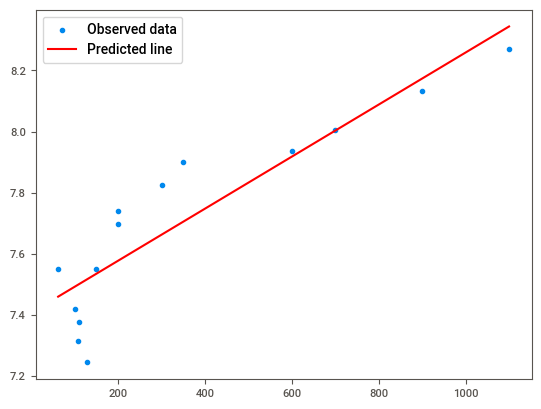

In [48]:
# Regression Line
plt.scatter(user_diet.Weight_gained, np.log(user_diet.Calories_consumed))
plt.plot(user_diet.Weight_gained, pred3, "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()

### Polynomial transformation 
### x = Weight_gained; x^2 = Weight_gained*Weight_gained; y = log(Calories_consumed)
### log(y) ~ x + x^2

In [49]:
X = pd.DataFrame(user_diet['Weight_gained'])

In [50]:
Y = pd.DataFrame(user_diet['Calories_consumed'])

In [51]:
model4 = smf.ols('np.log(Calories_consumed) ~ Weight_gained + I(Weight_gained*Weight_gained)', data = user_diet).fit()
model4.summary()

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     np.log(Calories_consumed)   R-squared:                       0.852
Model:                                   OLS   Adj. R-squared:                  0.825
Method:                        Least Squares   F-statistic:                     31.55
Date:                       Sat, 25 Feb 2023   Prob (F-statistic):           2.78e-05
Time:                               00:48:10   Log-Likelihood:                 10.125
No. Observations:                         14   AIC:                            -14.25
Df Residuals:                             11   BIC:                            -12.33
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.2892      0.084     86.724      0.000       7.104       7.474
Weight_gained                        0.0017      0.000      3.560      0.004       0.001       0.003
I(Weight_gained * Weight_gained) -7.689e-07   4.27e-07     -1.803      0.099   -1.71e-06     1.7e-07
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.721
Skew:                          -0.394   Prob(JB):                        0.697
Kurtosis:                       2.217   Cond. No.                     1.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# log(Calories_consumed) = 7.28924068 + 0.0017(Weight_gained) -7.689e-07(Weight_gained*Weight_gained)
# R-squared : 0.852  where |r| > 0.85 is considered as strong correlation
# RMSE : 240.8277

In [52]:
pred4 = model4.predict(pd.DataFrame(user_diet))
print(pred4)

0     7.390243
1     7.449270
2     7.461414
3     7.464435
4     7.491343
5     7.523555
6     7.593995
7     7.593995
8     7.723342
9     7.782249
10    8.019118
11    8.086955
12    8.176497
13    8.204529
dtype: float64


In [53]:
pred4_at = np.exp(pred4)
pred4_at

0     1620.099409
1     1718.608337
2     1739.606122
3     1744.868700
4     1792.457905
5     1851.135743
6     1986.232241
7     1986.232241
8     2260.501362
9     2397.660886
10    3038.496984
11    3251.772007
12    3556.374964
13    3657.476403
dtype: float64

In [54]:
# Error calculation
res4 = user_diet.Calories_consumed - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

240.82777570410545

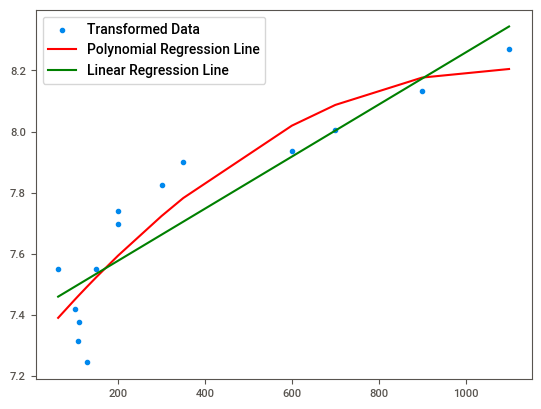

In [55]:
plt.scatter(X['Weight_gained'], np.log(Y['Calories_consumed']))
plt.plot(X['Weight_gained'], pred4, color = 'red')
plt.plot(X['Weight_gained'], pred3, color = 'green', label = 'linear')
plt.legend(['Transformed Data', 'Polynomial Regression Line', 'Linear Regression Line'])
plt.show()

### Choose the best model using RMSE

In [56]:
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)

In [57]:
table_rmse

,MODEL,RMSE
0,SLR,232.833501
1,Log model,253.558040
2,Exp model,272.420712
3,Poly model,240.827776


In [ ]:
# The model with low RMSE value is the best model. Simple linear Regression is the best model with :
# Calories_consumed = 1577.2007 + 2.1344(Weight_gained)
# R-squared : 0.897  where |r| > 0.85 is considered as strong correlation
# RMSE : 232.8335